In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl 

In [92]:
# Iris dataset for low dimentionality
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X_ir = iris.data.features 
y_ir = iris.data.targets 
y_ir = y_ir.to_numpy().ravel()
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 

# Combine into a single data frame.
#X_df_ir = pd.DataFrame(X_ir)
#y_df_ir = pd.DataFrame(y_ir, columns = ['y'])
#iris = pd.concat([X_ir,y_ir], axis=1)

#print(list(iris.columns)) # Chcecking all columns.
#print(iris.dtypes) # Check all data types.
#print(iris.shape)
#print(type(X_ir))
#print(type(y_ir))
iris

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

{'data': {'ids': None,
  'features':      sepal length  sepal width  petal length  petal width
  0             5.1          3.5           1.4          0.2
  1             4.9          3.0           1.4          0.2
  2             4.7          3.2           1.3          0.2
  3             4.6          3.1           1.5          0.2
  4             5.0          3.6           1.4          0.2
  ..            ...          ...           ...          ...
  145           6.7          3.0           5.2          2.3
  146           6.3          2.5           5.0          1.9
  147           6.5          3.0           5.2          2.0
  148           6.2          3.4           5.4          2.3
  149           5.9          3.0           5.1          1.8
  
  [150 rows x 4 columns],
  'targets':               class
  0       Iris-setosa
  1       Iris-setosa
  2       Iris-setosa
  3       Iris-setosa
  4       Iris-setosa
  ..              ...
  145  Iris-virginica
  146  Iris-virginica
  147  

In [96]:
# Wine dataset for midium-dimentionality
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X_wi = wine.data.features 
y_wi = wine.data.targets 
y_wi = y_wi.to_numpy().ravel()
# metadata 
print(wine.metadata) 
  
# variable information 
print(wine.variables) 

# Combine into a single data frame.
#X_df_wi = pd.DataFrame(X_wi)
#y_df_wi = pd.DataFrame(y_wi, columns = ['y'])
#wine= pd.concat([X_wi,y_wi], axis=1)

#print(list(wine.columns)) # Chcecking all columns.
#print(wine.dtypes) # Check all data types.
#print(wine.shape)
#print(type(X_wi))
#print(type(y_wi))
wine

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

{'data': {'ids': None,
  'features':      Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
  0      14.23       1.71  2.43               15.6        127           2.80   
  1      13.20       1.78  2.14               11.2        100           2.65   
  2      13.16       2.36  2.67               18.6        101           2.80   
  3      14.37       1.95  2.50               16.8        113           3.85   
  4      13.24       2.59  2.87               21.0        118           2.80   
  ..       ...        ...   ...                ...        ...            ...   
  173    13.71       5.65  2.45               20.5         95           1.68   
  174    13.40       3.91  2.48               23.0        102           1.80   
  175    13.27       4.28  2.26               20.0        120           1.59   
  176    13.17       2.59  2.37               20.0        120           1.65   
  177    14.13       4.10  2.74               24.5         96           2.05   
  
  

In [118]:
# Digits data sets
from sklearn.datasets import load_digits
digits = load_digits()

X_di = digits.data
y_di = digits.target

digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [45]:
# Standardize feature for each dataset.
scaler = StandardScaler()

X_ir_scaled = scaler.fit_transform(X_df_ir)
X_wi_scaled = scaler.fit_transform(X_df_wi)
X_di_scaled = scaler.fit_transform(X_di)

##### In plan, apply PCA for each dataset twice, low PCA and High PCA, before clustering. 

In [189]:
# For comparison, set low pca = 2 and high pca = 0.95 (retain 95% variance).
pca_low = PCA(n_components=2)
pca_high = PCA(n_components=0.95)

# PCA for Iris dataset
X_ir_pca_low = pca_low_ir.fit_transform(X_ir_scaled)
X_ir_pca_high = pca_high_ir.fit_transform(X_ir_scaled)

# PCA for Wine dataset
X_wi_pca_low = pca_low_wi.fit_transform(X_wi_scaled)
X_wi_pca_high = pca_high_wi.fit_transform(X_wi_scaled)

# PCA for Digits dataset
X_di_pca_low = pca_low_di.fit_transform(X_di_scaled)
X_di_pca_high = pca_high_di.fit_transform(X_di_scaled)

# To check the variance of a dataset explained for both configurations
print("Iris PCA Low Variance Explained:", sum(pca_low_ir.explained_variance_ratio_))
print("Iris PCA High Variance Explained:", sum(pca_high_ir.explained_variance_ratio_))
print("Wine PCA Low Variance Explained:", sum(pca_low_wi.explained_variance_ratio_))
print("Wine PCA High Variance Explained:", sum(pca_high_wi.explained_variance_ratio_))
print("Wine PCA Low Variance Explained:", sum(pca_low_di.explained_variance_ratio_))
print("Wine PCA High Variance Explained:", sum(pca_high_di.explained_variance_ratio_))

Iris PCA Low Variance Explained: 0.9580097536148197
Iris PCA High Variance Explained: 0.9580097536148197
Wine PCA Low Variance Explained: 0.5540633835693528
Wine PCA High Variance Explained: 0.9616971684450644
Wine PCA Low Variance Explained: 0.21594970500832794
Wine PCA High Variance Explained: 0.9507791125066466


##### It is clear to see that as the increment of dimentionality and dataset size, the gaps of the two pca configuration increase.

#### Now,apply three clustering algorithms on PCA-reduced datasets.

In [66]:
# K-means
# Iris Dataset (Low PCA)
kmeans_low_iris = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42).fit(X_ir_pca_low)
kmeans_high_iris = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42).fit(X_ir_pca_high)

# Wine Dataset
kmeans_low_wine = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42).fit(X_wi_pca_low)
kmeans_high_wine = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42).fit(X_wi_pca_high)

# Digits Dataset
kmeans_low_digits = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42).fit(X_di_pca_low)
kmeans_high_digits = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42).fit(X_di_pca_high)


In [68]:
# Spectral Clustering 
# Iris dataset (Low PCA, with nearest_neighbors)
spectral_low_iris = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=10, random_state=42).fit(X_ir_pca_low)
spectral_high_iris = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=10, random_state=42).fit(X_ir_pca_high)

# Wine dataset
spectral_low_wine = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=10, random_state=42).fit(X_wi_pca_low)
spectral_high_wine = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=10, random_state=42).fit(X_wi_pca_high)

# Digits dataset
spectral_low_digits = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=10, random_state=42).fit(X_di_pca_low)
spectral_high_digits = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=10, random_state=42).fit(X_di_pca_high)

In [70]:
# Gaussian mixture model
# Iris Dataset
gmm_low_iris = GaussianMixture(n_components=3, covariance_type='full', n_init=10, max_iter=300, random_state=42).fit(X_ir_pca_low)
gmm_high_iris = GaussianMixture(n_components=3, covariance_type='full', n_init=10, max_iter=300, random_state=42).fit(X_ir_pca_high)

# Wine Dataset
gmm_low_wine = GaussianMixture(n_components=3, covariance_type='full', n_init=10, max_iter=300, random_state=42).fit(X_wi_pca_low)
gmm_high_wine = GaussianMixture(n_components=3, covariance_type='full', n_init=10, max_iter=300, random_state=42).fit(X_wi_pca_high)

# Digits Dataset
gmm_low_digits = GaussianMixture(n_components=3, covariance_type='full', n_init=10, max_iter=300, random_state=42).fit(X_di_pca_low)
gmm_high_digits = GaussianMixture(n_components=3, covariance_type='full', n_init=10, max_iter=300, random_state=42).fit(X_di_pca_high)


#### Evaluate clustering performance

##### To assess each clustering's performance, use Silhouette Score and Adjusted Rand Index (ARI) as comparison standards.

In [112]:
# Iris dataset (Low PCA)
silhouette_kmeans_low_iris = silhouette_score(X_ir_pca_low, kmeans_low_iris.labels_)
silhouette_spectral_low_iris = silhouette_score(X_ir_pca_low, spectral_low_iris.labels_)
silhouette_gmm_low_iris = silhouette_score(X_ir_pca_low, gmm_low_iris.predict(X_ir_pca_low))

ari_kmeans_low_iris = adjusted_rand_score(y_ir, kmeans_low_iris.labels_)
ari_spectral_low_iris = adjusted_rand_score(y_ir, spectral_low_iris.labels_)
ari_gmm_low_iris = adjusted_rand_score(y_ir, gmm_low_iris.predict(X_ir_pca_low))

# Iris dataset (High PCA)
silhouette_kmeans_high_iris = silhouette_score(X_ir_pca_high, kmeans_high_iris.labels_)
silhouette_spectral_high_iris = silhouette_score(X_ir_pca_high, spectral_high_iris.labels_)
silhouette_gmm_high_iris = silhouette_score(X_ir_pca_high, gmm_low_iris.predict(X_ir_pca_high))

ari_kmeans_high_iris = adjusted_rand_score(y_ir, kmeans_high_iris.labels_)
ari_spectral_high_iris = adjusted_rand_score(y_ir, spectral_high_iris.labels_)
ari_gmm_high_iris = adjusted_rand_score(y_ir, gmm_high_iris.predict(X_ir_pca_high))

print(f"Iris (Low PCA) Silhouette Scores - K-Means: {silhouette_kmeans_low_iris}, "
      f"Spectral: {silhouette_spectral_low_iris}, GMM: {silhouette_gmm_low_iris}")
print(f"Iris (Low PCA) ARI Scores - K-Means: {ari_kmeans_low_iris}, "
      f"Spectral: {ari_spectral_low_iris}, GMM: {ari_gmm_low_iris}")
print(f"Iris (High PCA) Silhouette Scores - K-Means: {silhouette_kmeans_high_iris}, "
      f"Spectral: {silhouette_spectral_high_iris}, GMM: {silhouette_gmm_high_iris}")
print(f"Iris (High PCA) ARI Scores - K-Means: {ari_kmeans_high_iris}, "
      f"Spectral: {ari_spectral_high_iris}, GMM: {ari_gmm_high_iris}")

Iris (Low PCA) Silhouette Scores - K-Means: 0.5081546339516393, Spectral: 0.5259743621110915, GMM: 0.45288161593750487
Iris (Low PCA) ARI Scores - K-Means: 0.6201351808870379, Spectral: 0.44987300809963465, GMM: 0.5073487662737015
Iris (High PCA) Silhouette Scores - K-Means: 0.5081546339516393, Spectral: 0.5259743621110915, GMM: 0.45288161593750487
Iris (High PCA) ARI Scores - K-Means: 0.6201351808870379, Spectral: 0.44987300809963465, GMM: 0.5073487662737015


In [114]:
# Wine dataset (Low PCA)
silhouette_kmeans_low_wine = silhouette_score(X_wi_pca_low, kmeans_low_wine.labels_)
silhouette_spectral_low_wine = silhouette_score(X_wi_pca_low, spectral_low_wine.labels_)
silhouette_gmm_low_wine = silhouette_score(X_wi_pca_low, gmm_low_wine.predict(X_wi_pca_low))

ari_kmeans_low_wine = adjusted_rand_score(y_wi, kmeans_low_wine.labels_)
ari_spectral_low_wine = adjusted_rand_score(y_wi, spectral_low_wine.labels_)
ari_gmm_low_wine = adjusted_rand_score(y_wi, gmm_low_wine.predict(X_wi_pca_low))

# Wine dataset (High PCA)
silhouette_kmeans_high_wine = silhouette_score(X_wi_pca_high, kmeans_high_wine.labels_)
silhouette_spectral_high_wine = silhouette_score(X_wi_pca_high, spectral_high_wine.labels_)
silhouette_gmm_high_wine = silhouette_score(X_wi_pca_high, gmm_high_wine.predict(X_wi_pca_high))

ari_kmeans_high_wine = adjusted_rand_score(y_wi, kmeans_high_wine.labels_)
ari_spectral_high_wine = adjusted_rand_score(y_wi, spectral_high_wine.labels_)
ari_gmm_high_wine = adjusted_rand_score(y_wi, gmm_high_wine.predict(X_wi_pca_high))

print(f"Wine (Low PCA) Silhouette Scores - K-Means: {silhouette_kmeans_low_wine}, "
      f"Spectral: {silhouette_spectral_low_wine}, GMM: {silhouette_gmm_low_wine}")
print(f"Wine (Low PCA) ARI Scores - K-Means: {ari_kmeans_low_wine}, "
      f"Spectral: {ari_spectral_low_wine}, GMM: {ari_gmm_low_wine}")
print(f"Wine (High PCA) Silhouette Scores - K-Means: {silhouette_kmeans_high_wine}, "
      f"Spectral: {silhouette_spectral_high_wine}, GMM: {silhouette_gmm_high_wine}")
print(f"Wine (High PCA) ARI Scores - K-Means: {ari_kmeans_high_wine}, "
      f"Spectral: {ari_spectral_high_wine}, GMM: {ari_gmm_high_wine}")

Wine (Low PCA) Silhouette Scores - K-Means: 0.5610505693103246, Spectral: 0.5590883962040383, GMM: 0.5581473461293219
Wine (Low PCA) ARI Scores - K-Means: 0.8950582389649661, Spectral: 0.8960646870999063, GMM: 0.8962913995151285
Wine (High PCA) Silhouette Scores - K-Means: 0.2986748294369287, Spectral: 0.2955083312161896, GMM: 0.2937407026605509
Wine (High PCA) ARI Scores - K-Means: 0.8974949815093207, Spectral: 0.8635987920128989, GMM: 0.9650516223023584


In [120]:
# Digits dataset (Low PCA)
silhouette_kmeans_low_digits = silhouette_score(X_di_pca_low, kmeans_low_digits.labels_)
silhouette_spectral_low_digits = silhouette_score(X_di_pca_low, spectral_low_digits.labels_)
silhouette_gmm_low_digits = silhouette_score(X_di_pca_low, gmm_low_digits.predict(X_di_pca_low))

ari_kmeans_low_digits = adjusted_rand_score(y_di, kmeans_low_digits.labels_)
ari_spectral_low_digits = adjusted_rand_score(y_di, spectral_low_digits.labels_)
ari_gmm_low_digits = adjusted_rand_score(y_di, gmm_low_digits.predict(X_di_pca_low))

# Digits dataset (High PCA)
silhouette_kmeans_high_digits = silhouette_score(X_di_pca_high, kmeans_high_digits.labels_)
silhouette_spectral_high_digits = silhouette_score(X_di_pca_high, spectral_high_digits.labels_)
silhouette_gmm_high_digits = silhouette_score(X_di_pca_high, gmm_high_digits.predict(X_di_pca_high))

ari_kmeans_high_digits = adjusted_rand_score(y_di, kmeans_high_digits.labels_)
ari_spectral_high_digits = adjusted_rand_score(y_di, spectral_high_digits.labels_)
ari_gmm_high_digits = adjusted_rand_score(y_di, gmm_high_digits.predict(X_di_pca_high))

print(f"Digits (Low PCA) Silhouette Scores - K-Means: {silhouette_kmeans_low_digits}, "
      f"Spectral: {silhouette_spectral_low_digits}, GMM: {silhouette_gmm_low_digits}")
print(f"Digits (Low PCA) ARI Scores - K-Means: {ari_kmeans_low_digits}, "
      f"Spectral: {ari_spectral_low_digits}, GMM: {ari_gmm_low_digits}")
print(f"Digits (High PCA) Silhouette Scores - K-Means: {silhouette_kmeans_high_digits}, "
      f"Spectral: {silhouette_spectral_high_digits}, GMM: {silhouette_gmm_high_digits}")
print(f"Digits (High PCA) ARI Scores - K-Means: {ari_kmeans_high_digits}, "
      f"Spectral: {ari_spectral_high_digits}, GMM: {ari_gmm_high_digits}")

Digits (Low PCA) Silhouette Scores - K-Means: 0.3912157405945881, Spectral: 0.350195244534315, GMM: 0.3843559068731101
Digits (Low PCA) ARI Scores - K-Means: 0.20535234616293874, Spectral: 0.188904225478617, GMM: 0.180652687558126
Digits (High PCA) Silhouette Scores - K-Means: 0.10466915382755088, Spectral: 0.026163715986846053, GMM: 0.17689889105514128
Digits (High PCA) ARI Scores - K-Means: 0.22266330774535026, Spectral: 0.10696038126086584, GMM: 0.026311745364774167


#### Try to improve the performance of digits dataset

In [137]:
# Try to improve by Hyperparameter Tuning. 

# K-Means
kmeans_digits_l = KMeans(n_clusters=10, init='k-means++', n_init=50, random_state=42).fit(X_di_pca_low)
kmeans_digits_h = KMeans(n_clusters=10, init='k-means++', n_init=50, random_state=42).fit(X_di_pca_high)

# Spectral Clustering
spectral_digits_l = SpectralClustering(n_clusters=10, affinity='nearest_neighbors', n_neighbors=30, random_state=42).fit(X_di_pca_low)
spectral_digits_h = SpectralClustering(n_clusters=10, affinity='nearest_neighbors', n_neighbors=30, random_state=42).fit(X_di_pca_high)

# Gaussian Mixture Model (GMM)
gmm_digits_l = GaussianMixture(n_components=10, covariance_type='diag', n_init=10, random_state=42).fit(X_di_pca_low)
gmm_digits_h = GaussianMixture(n_components=10, covariance_type='diag', n_init=10, random_state=42).fit(X_di_pca_high)

# Evaluate Low PCA
silhouette_kmeans_digits_l = silhouette_score(X_di_pca_low, kmeans_digits_l.labels_)
silhouette_spectral_digits_l = silhouette_score(X_di_pca_low, spectral_digits_l.labels_)
silhouette_gmm_digits_l = silhouette_score(X_di_pca_low, gmm_digits_l.predict(X_di_pca_low))

ari_kmeans_digits_l = adjusted_rand_score(y_di, kmeans_digits_l.labels_)
ari_spectral_digits_l = adjusted_rand_score(y_di, spectral_digits_l.labels_)
ari_gmm_digits_l = adjusted_rand_score(y_di, gmm_digits_l.predict(X_di_pca_low))

# Evaluate High PCA
silhouette_kmeans_digits_h = silhouette_score(X_di_pca_high, kmeans_digits_h.labels_)
silhouette_spectral_digits_h = silhouette_score(X_di_pca_high, spectral_digits_h.labels_)
silhouette_gmm_digits_h = silhouette_score(X_di_pca_high, gmm_digits_h.predict(X_di_pca_high))

ari_kmeans_digits_h = adjusted_rand_score(y_di, kmeans_digits_h.labels_)
ari_spectral_digits_h = adjusted_rand_score(y_di, spectral_digits_h.labels_)
ari_gmm_digits_h = adjusted_rand_score(y_di, gmm_digits_h.predict(X_di_pca_high))

# Print Results
print(f"Digits (Improved Low PCA) Silhouette Scores - K-Means: {silhouette_kmeans_digits_l}, "
      f"Spectral: {silhouette_spectral_digits_l}, GMM: {silhouette_gmm_digits_l}")
print(f"Digits (Improved Low PCA) ARI Scores - K-Means: {ari_kmeans_digits_l}, "
      f"Spectral: {ari_spectral_digits_l}, GMM: {ari_gmm_digits_l}")

print(f"Digits (Improved High PCA) Silhouette Scores - K-Means: {silhouette_kmeans_digits_h}, "
      f"Spectral: {silhouette_spectral_digits_h}, GMM: {silhouette_gmm_digits_h}")
print(f"Digits (Improved High PCA) ARI Scores - K-Means: {ari_kmeans_digits_h}, "
      f"Spectral: {ari_spectral_digits_h}, GMM: {ari_gmm_digits_h}")

Digits (Improved Low PCA) Silhouette Scores - K-Means: 0.37545838827018746, Spectral: 0.3330655183686379, GMM: 0.3456600434070555
Digits (Improved Low PCA) ARI Scores - K-Means: 0.32558093306232855, Spectral: 0.3215872635986533, GMM: 0.3150545527091328
Digits (Improved High PCA) Silhouette Scores - K-Means: 0.16071351186599367, Spectral: 0.15531280629420968, GMM: 0.0920958578021429
Digits (Improved High PCA) ARI Scores - K-Means: 0.4667522999108794, Spectral: 0.652445581162942, GMM: 0.3992737568700192


#### Visualizations

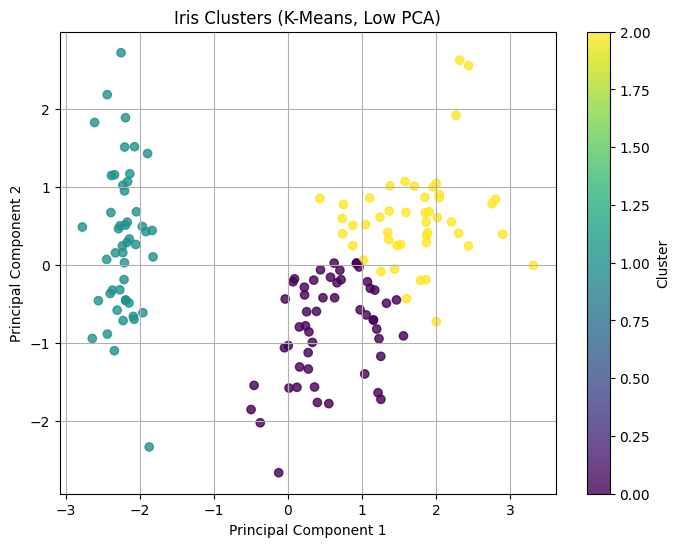

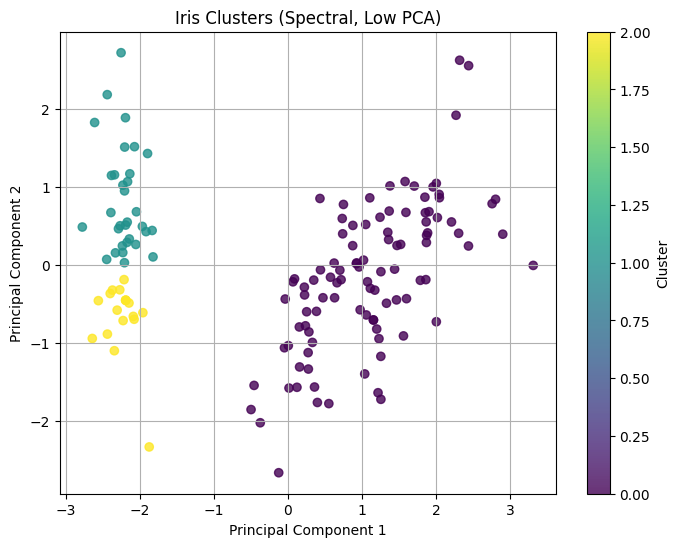

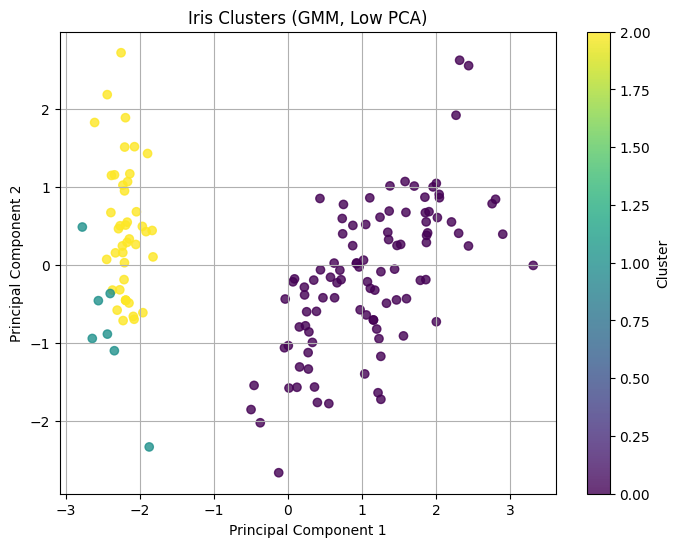

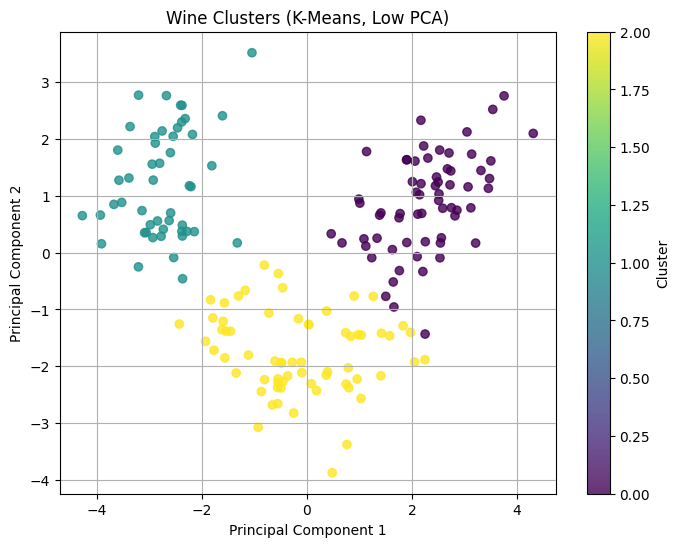

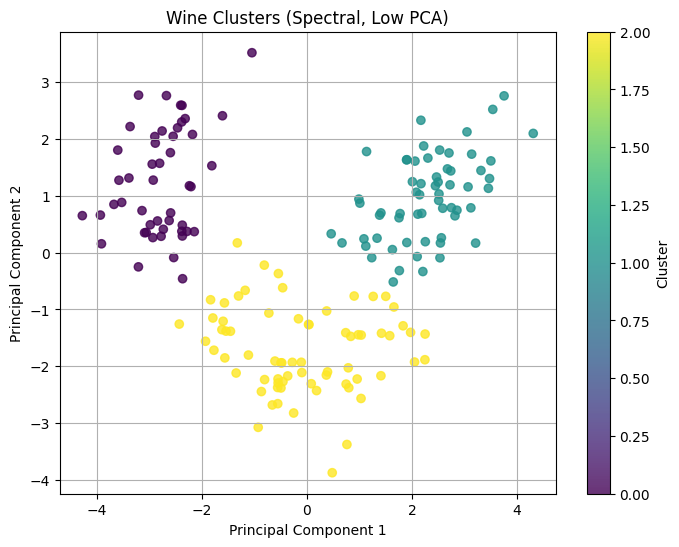

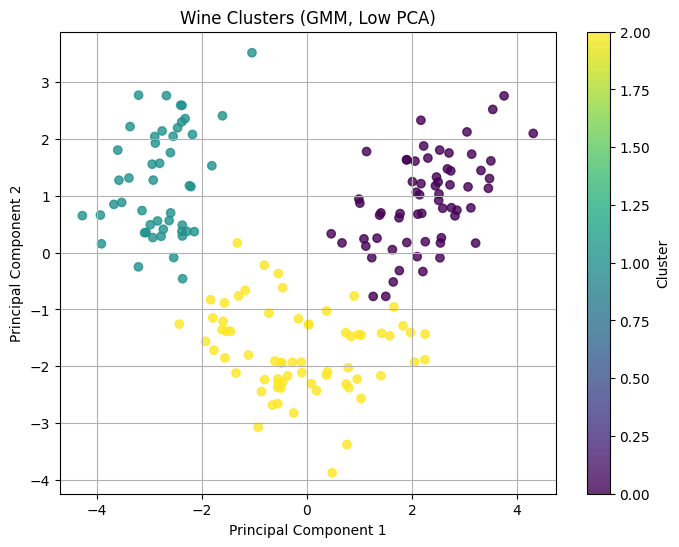

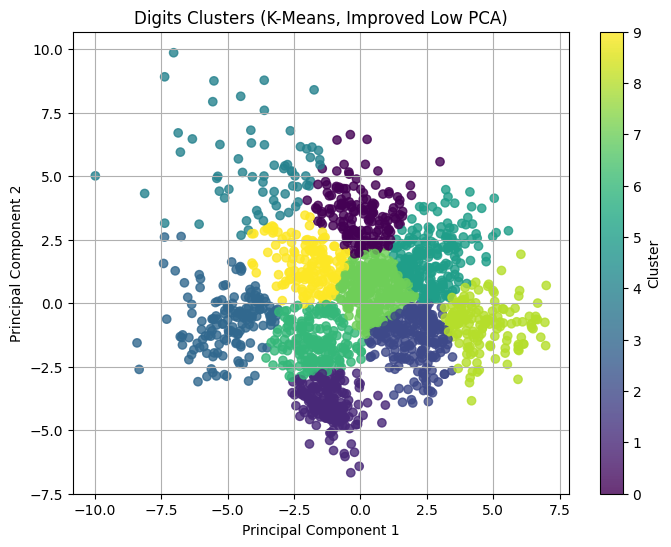

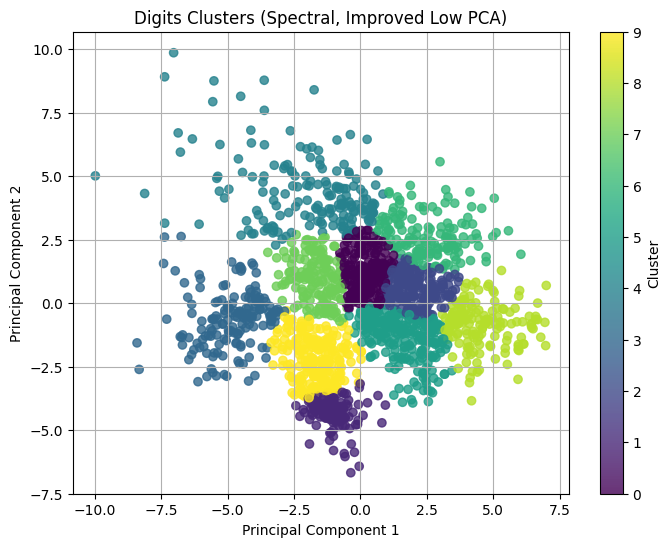

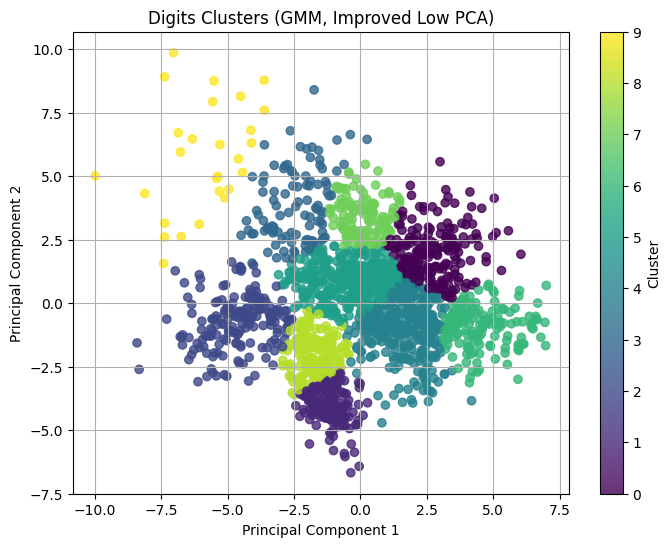

In [156]:
# Scatter plots.
def plot_clusters(X_pca, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.8)
    plt.colorbar(label='Cluster')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid()
    plt.show()

# Low PCA
# Iris dataset
plot_clusters(X_ir_pca_low, kmeans_low_iris.labels_, "Iris Clusters (K-Means, Low PCA)")
plot_clusters(X_ir_pca_low, spectral_low_iris.labels_, "Iris Clusters (Spectral, Low PCA)")
plot_clusters(X_ir_pca_low, gmm_low_iris.predict(X_ir_pca_low), "Iris Clusters (GMM, Low PCA)")

# Wine dataset
plot_clusters(X_wi_pca_low, kmeans_low_wine.labels_, "Wine Clusters (K-Means, Low PCA)")
plot_clusters(X_wi_pca_low, spectral_low_wine.labels_, "Wine Clusters (Spectral, Low PCA)")
plot_clusters(X_wi_pca_low, gmm_low_wine.predict(X_wi_pca_low), "Wine Clusters (GMM, Low PCA)")

# Digits dataset
plot_clusters(X_di_pca_low, kmeans_digits_l.labels_, "Digits Clusters (K-Means, Improved Low PCA)")
plot_clusters(X_di_pca_low, spectral_digits_l.labels_, "Digits Clusters (Spectral, Improved Low PCA)")
plot_clusters(X_di_pca_low, gmm_digits_l.predict(X_di_pca_low), "Digits Clusters (GMM, Improved Low PCA)")


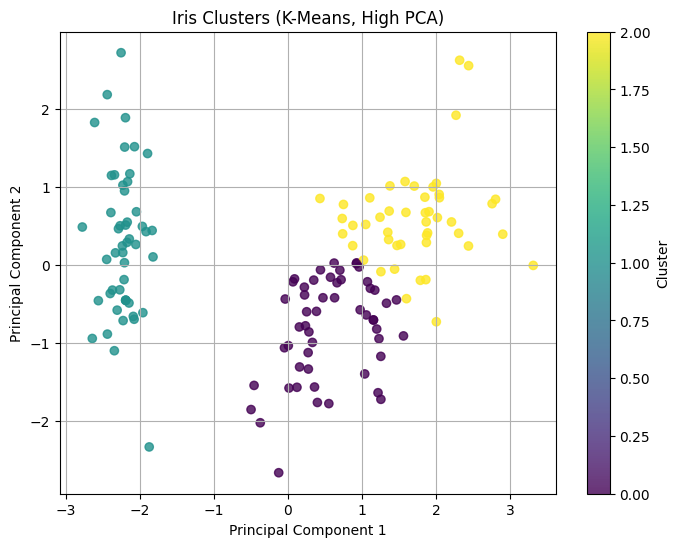

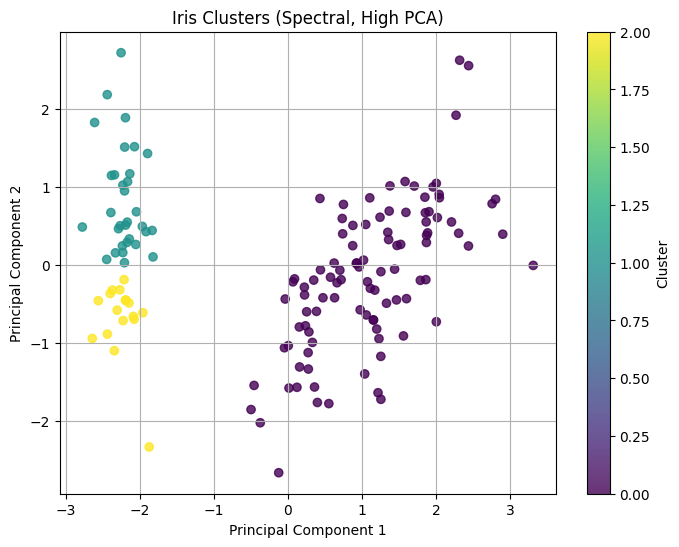

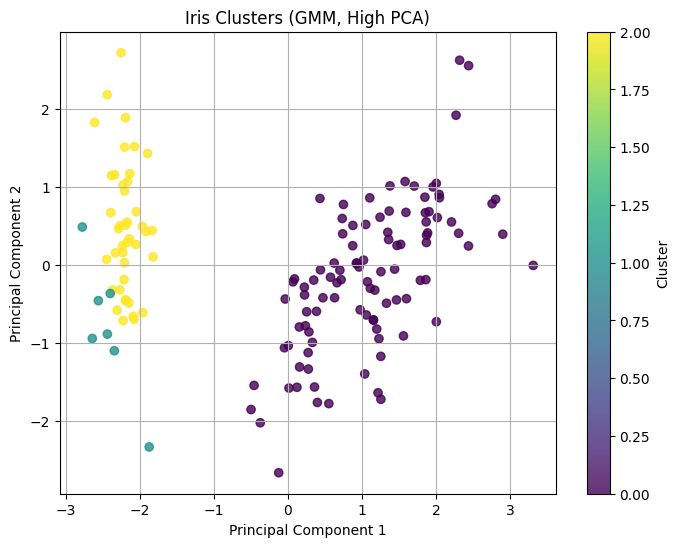

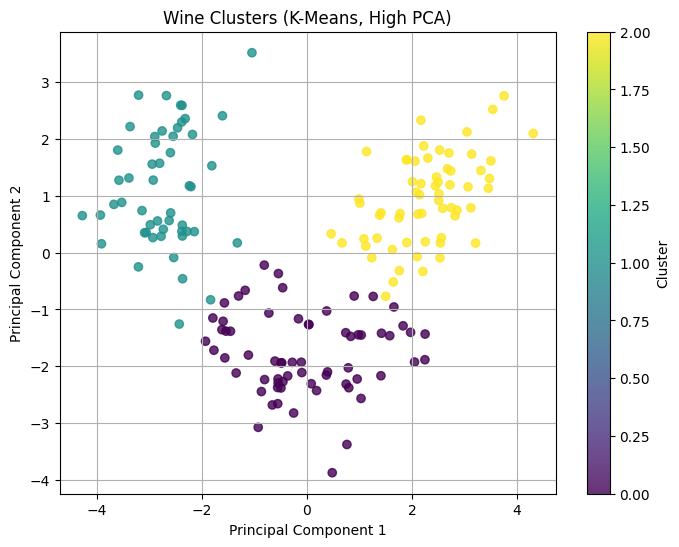

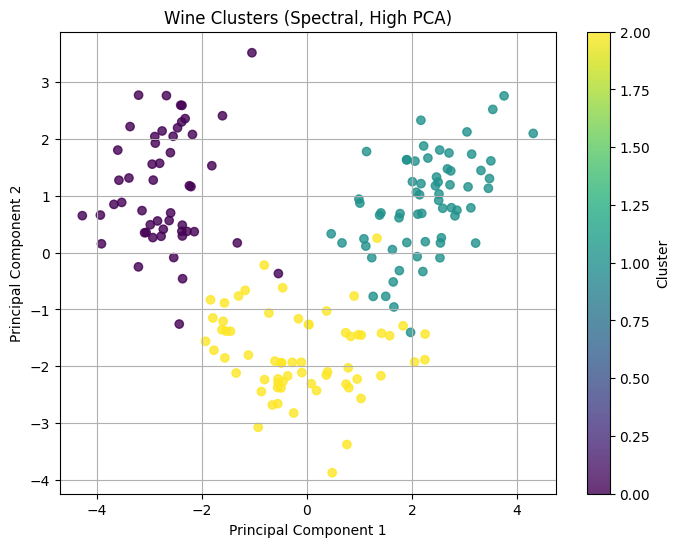

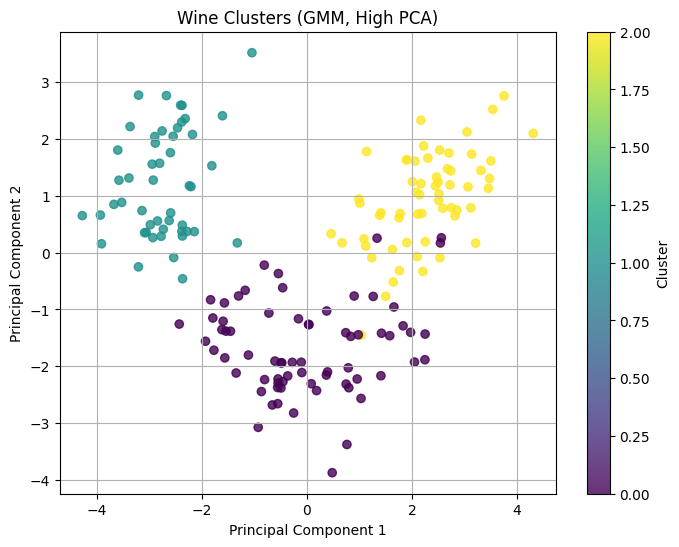

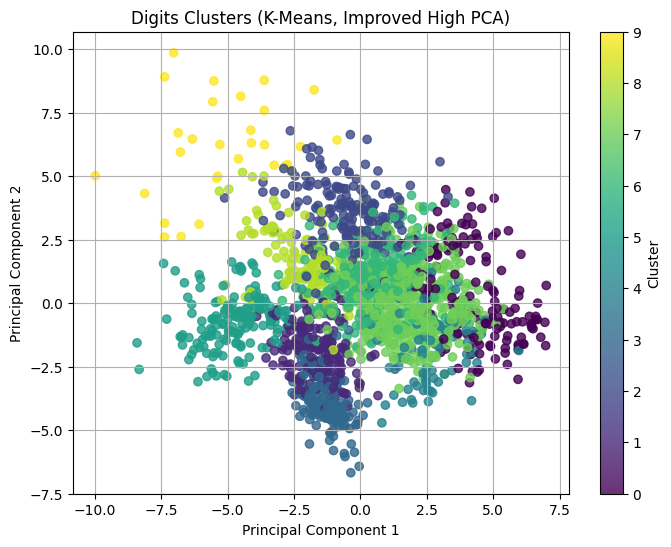

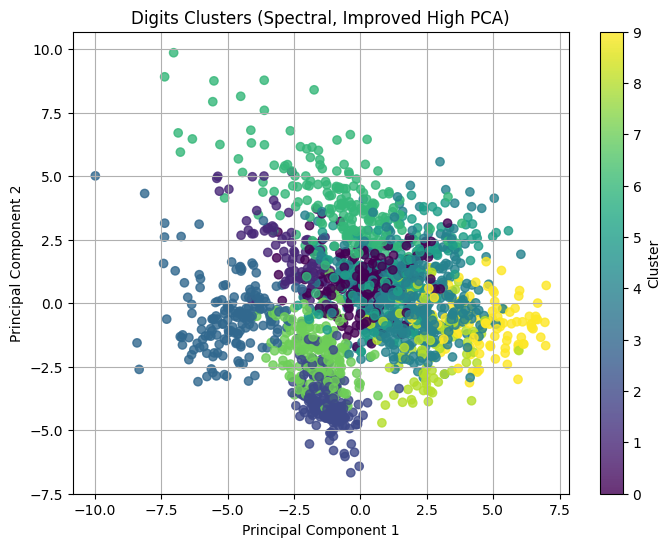

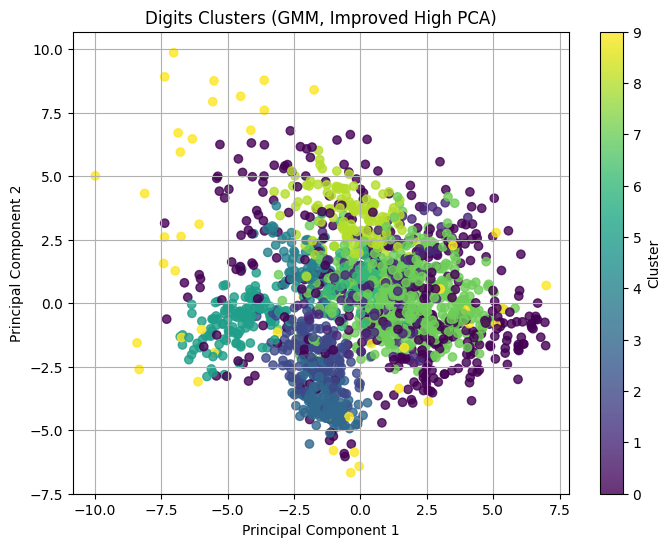

In [168]:
# High PCA
# Iris dataset
plot_clusters(X_ir_pca_high, kmeans_high_iris.labels_, "Iris Clusters (K-Means, High PCA)")
plot_clusters(X_ir_pca_high, spectral_high_iris.labels_, "Iris Clusters (Spectral, High PCA)")
plot_clusters(X_ir_pca_high, gmm_high_iris.predict(X_ir_pca_high), "Iris Clusters (GMM, High PCA)")

# Wine dataset
plot_clusters(X_wi_pca_high, kmeans_high_wine.labels_, "Wine Clusters (K-Means, High PCA)")
plot_clusters(X_wi_pca_high, spectral_high_wine.labels_, "Wine Clusters (Spectral, High PCA)")
plot_clusters(X_wi_pca_high, gmm_high_wine.predict(X_wi_pca_high), "Wine Clusters (GMM, High PCA)")

# Digits dataset
plot_clusters(X_di_pca_high, kmeans_digits_h.labels_, "Digits Clusters (K-Means, Improved High PCA)")
plot_clusters(X_di_pca_high, spectral_digits_h.labels_, "Digits Clusters (Spectral, Improved High PCA)")
plot_clusters(X_di_pca_high, gmm_digits_h.predict(X_di_pca_high), "Digits Clusters (GMM, Improved High PCA)")

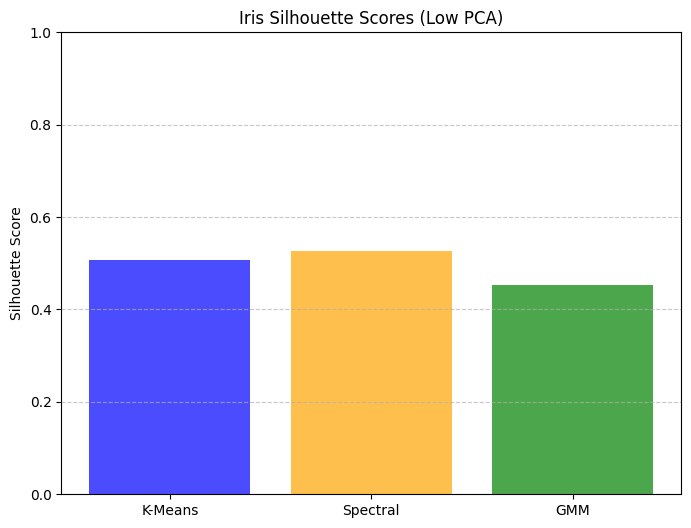

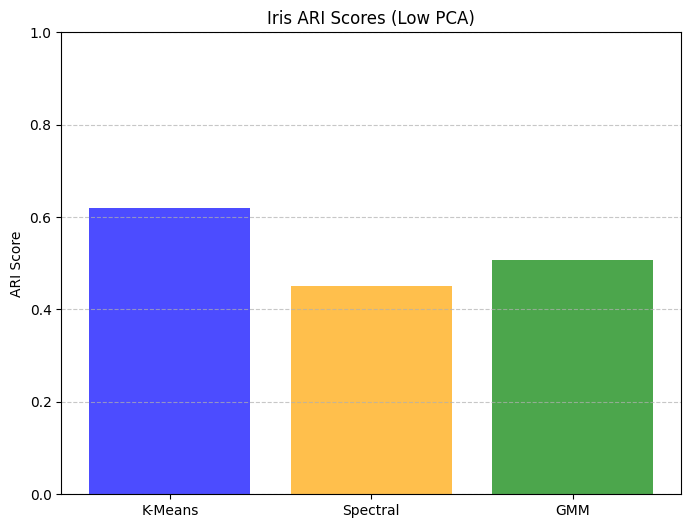

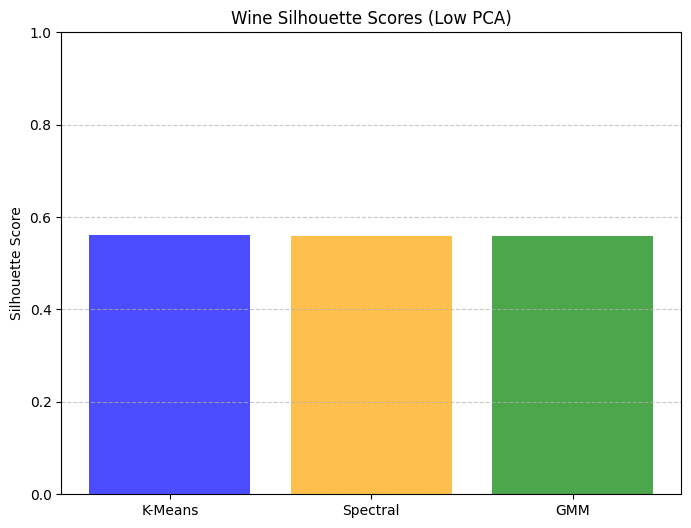

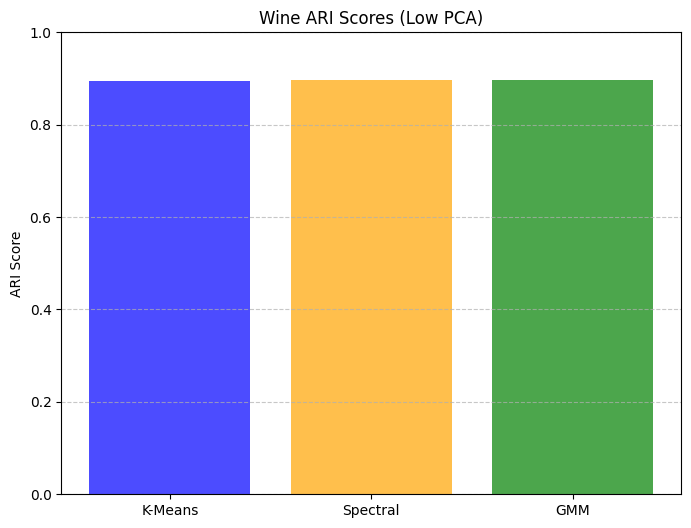

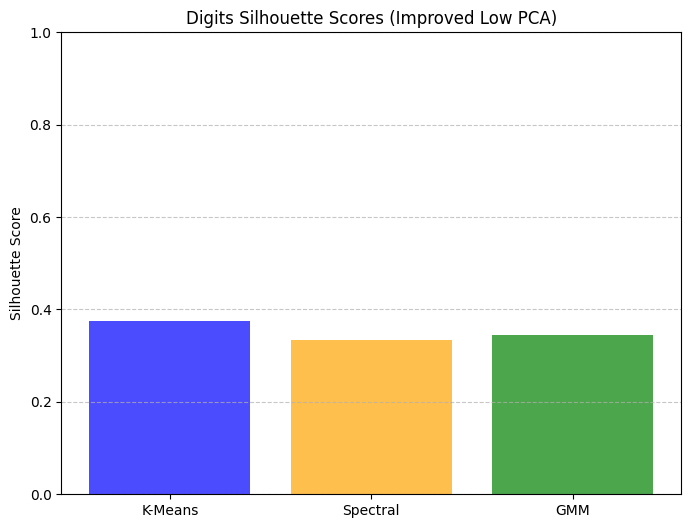

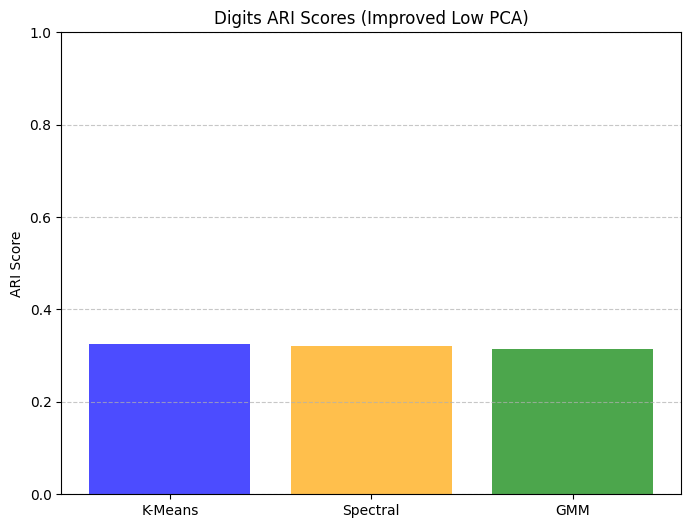

In [158]:
def plot_metrics(metrics, labels, title, ylabel):
    x = np.arange(len(labels))
    plt.figure(figsize=(8, 6))
    plt.bar(x, metrics, color=['blue', 'orange', 'green'], alpha=0.7)
    plt.xticks(x, labels)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Iris dataset (Low PCA)
silhouette_iris = [silhouette_kmeans_low_iris, silhouette_spectral_low_iris, silhouette_gmm_low_iris]
ari_iris = [ari_kmeans_low_iris, ari_spectral_low_iris, ari_gmm_low_iris]
methods = ["K-Means", "Spectral", "GMM"]

plot_metrics(silhouette_iris, methods, "Iris Silhouette Scores (Low PCA)", "Silhouette Score")
plot_metrics(ari_iris, methods, "Iris ARI Scores (Low PCA)", "ARI Score")

# Metrics for Wine dataset (Low PCA)
silhouette_wine = [silhouette_kmeans_low_wine, silhouette_spectral_low_wine, silhouette_gmm_low_wine]
ari_wine = [ari_kmeans_low_wine, ari_spectral_low_wine, ari_gmm_low_wine]

plot_metrics(silhouette_wine, methods, "Wine Silhouette Scores (Low PCA)", "Silhouette Score")
plot_metrics(ari_wine, methods, "Wine ARI Scores (Low PCA)", "ARI Score")

# Metrics for Digits dataset (Improved Low PCA)
silhouette_digits = [silhouette_kmeans_digits_l, silhouette_spectral_digits_l, silhouette_gmm_digits_l]
ari_digits = [ari_kmeans_digits_l, ari_spectral_digits_l, ari_gmm_digits_l]

plot_metrics(silhouette_digits, methods, "Digits Silhouette Scores (Improved Low PCA)", "Silhouette Score")
plot_metrics(ari_digits, methods, "Digits ARI Scores (Improved Low PCA)", "ARI Score")


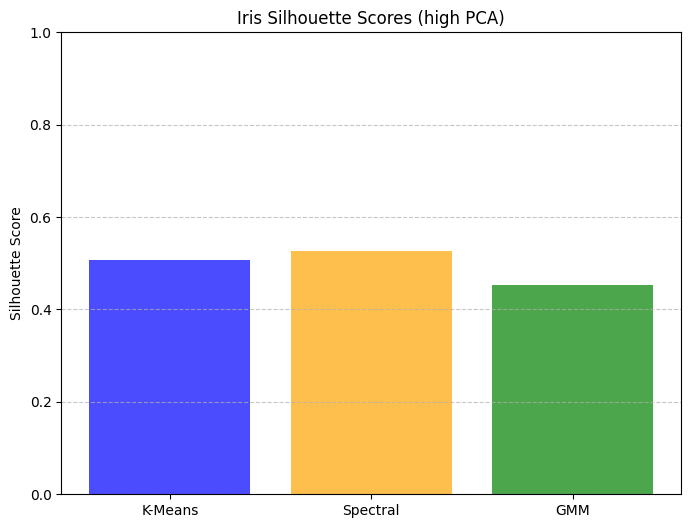

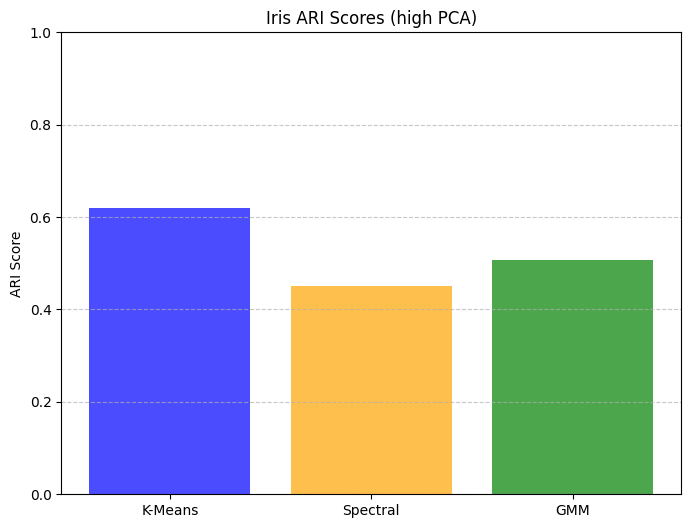

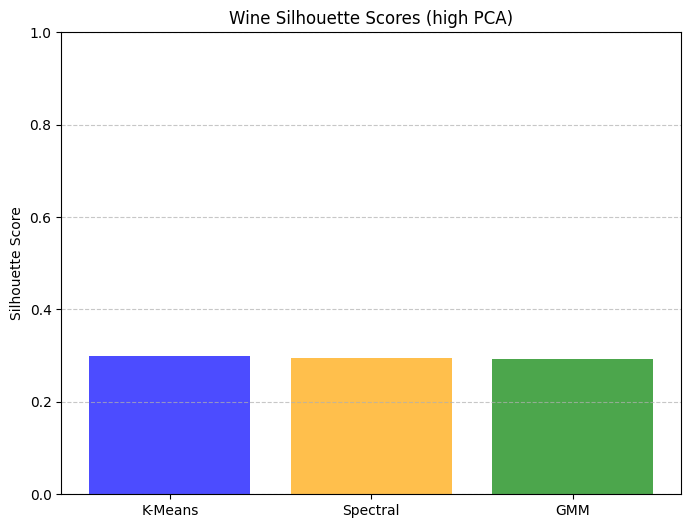

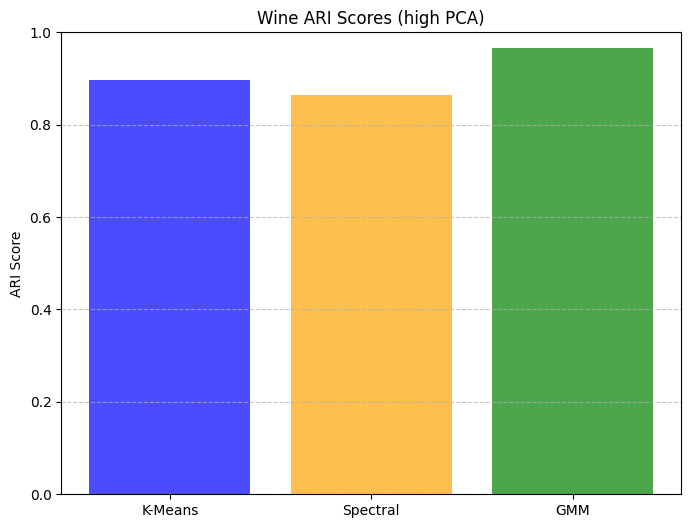

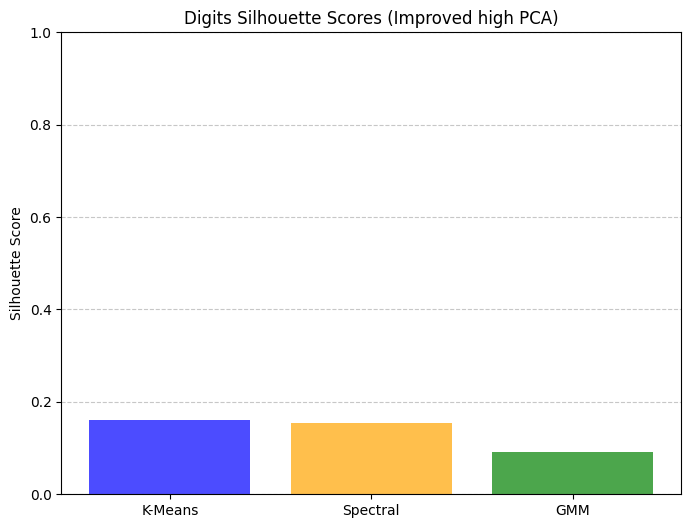

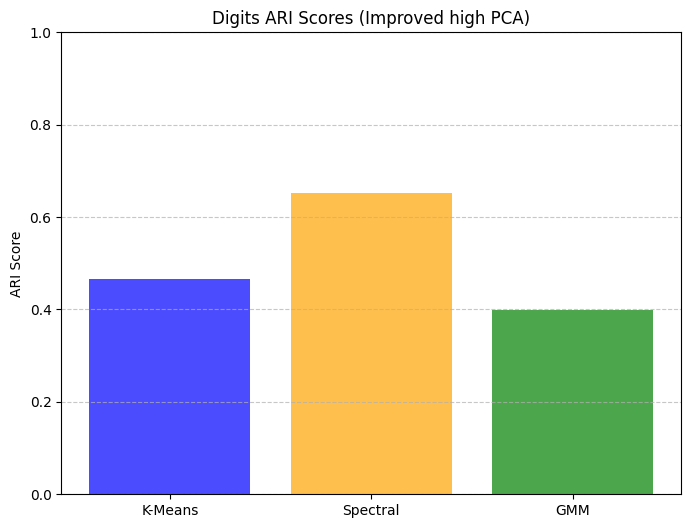

In [197]:
# Iris dataset (High PCA)
silhouette_iris = [silhouette_kmeans_high_iris, silhouette_spectral_high_iris, silhouette_gmm_high_iris]
ari_iris = [ari_kmeans_high_iris, ari_spectral_high_iris, ari_gmm_high_iris]
methods = ["K-Means", "Spectral", "GMM"]

plot_metrics(silhouette_iris, methods, "Iris Silhouette Scores (high PCA)", "Silhouette Score")
plot_metrics(ari_iris, methods, "Iris ARI Scores (high PCA)", "ARI Score")

# Metrics for Wine dataset (High PCA)
silhouette_wine = [silhouette_kmeans_high_wine, silhouette_spectral_high_wine, silhouette_gmm_high_wine]
ari_wine = [ari_kmeans_high_wine, ari_spectral_high_wine, ari_gmm_high_wine]

plot_metrics(silhouette_wine, methods, "Wine Silhouette Scores (high PCA)", "Silhouette Score")
plot_metrics(ari_wine, methods, "Wine ARI Scores (high PCA)", "ARI Score")

# Metrics for Digits dataset (Improved High PCA)
silhouette_digits = [silhouette_kmeans_digits_h, silhouette_spectral_digits_h, silhouette_gmm_digits_h]
ari_digits = [ari_kmeans_digits_h, ari_spectral_digits_h, ari_gmm_digits_h]

plot_metrics(silhouette_digits, methods, "Digits Silhouette Scores (Improved high PCA)", "Silhouette Score")
plot_metrics(ari_digits, methods, "Digits ARI Scores (Improved high PCA)", "ARI Score")

In [171]:
# MNIST dataset for additional testing. (large scale dimentionality)
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_mn = np.concatenate((X_train, X_test))
y_mn = np.concatenate((y_train, y_test))

# Flatten images for PCA, 28x28 -> 784 features
X_mn = X_mn.reshape(X_mn.shape[0], -1)

print("Shape of X_mn:", X_mn.shape)
print("Shape of y_mn:", y_mn.shape)

Shape of X_mn: (70000, 784)
Shape of y_mn: (70000,)


In [173]:
# Standardize
X_mn_scaled = scaler.fit_transform(X_mn)

In [175]:
# PCA for MNIST dataset.
X_ir_pca_low = pca_low_mn.fit_transform(X_ir_scaled)
X_ir_pca_high = pca_high_mn.fit_transform(X_ir_scaled)
# To check the variance of a dataset explained for both configurations
print("MNIST PCA Low Variance Explained:", sum(pca_low_mn.explained_variance_ratio_))
print("MNIST PCA High Variance Explained:", sum(pca_high_mn.explained_variance_ratio_))


NameError: name 'pca_low_mn' is not defined